In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
dataset_path = "/content/water_potability.csv"
df = pd.read_csv(dataset_path)

In [13]:
# Data Preprocessing: Handling missing values
df.fillna(df.mean(), inplace=True)

In [14]:
# Splitting features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [15]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Splitting data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [34]:
# Define Neural Network Model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [36]:
# Get input shape from X_train
input_shape = X_train.shape[1]

# Build model with specified input shape
model = build_model(input_shape)
model.summary()
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,369 (40.50 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5420 - loss: 1.2514 - val_accuracy: 0.6436 - val_loss: 1.1100
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6571 - loss: 1.0633 - val_accuracy: 0.6558 - val_loss: 1.0438
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.9856 - val_accuracy: 0.6497 - val_loss: 1.0064
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7045 - loss: 0.9384 - val_accuracy: 0.6660 - val_loss: 0.9564
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7069 - loss: 0.8923 - val_accuracy: 0.6538 - val_loss: 0.9370
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7078 - loss: 0.8519 - val_accuracy: 0.6538 - val_loss: 0.9120
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7252 - loss: 0.8262 - val_accuracy: 0.6619 - val_loss: 0.8781
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7382 - loss: 0.7883 - val_accuracy: 0.6823 - val_loss:

In [37]:
# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix and Metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       307
           1       0.59      0.45      0.51       185

    accuracy                           0.67       492
   macro avg       0.65      0.63      0.63       492
weighted avg       0.66      0.67      0.66       492

Confusion Matrix:
 [[248  59]
 [101  84]]
Accuracy: 0.6748
Precision: 0.5874
Recall: 0.4541
F1 Score: 0.5122


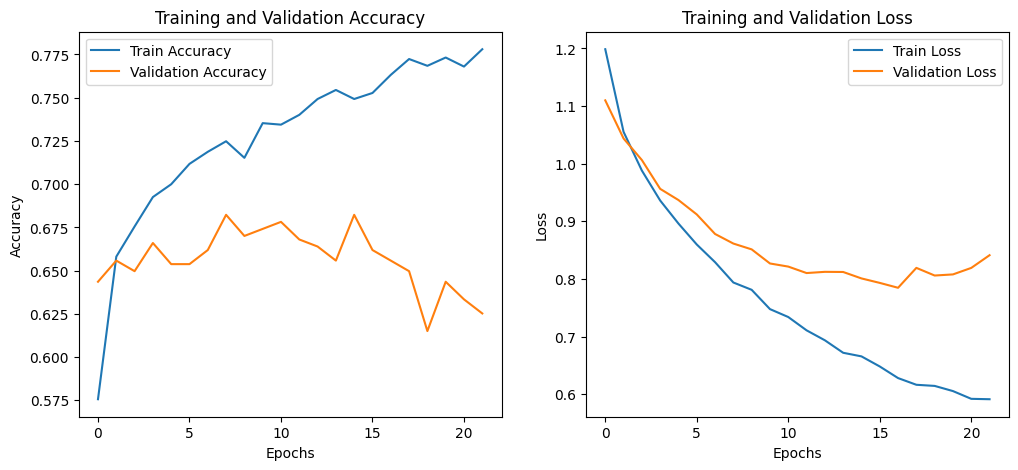

In [38]:

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
